# Encoders


Os modelos de machine learning so aceitam dados numericos, então para as colunas categoricas, vamos usar um ecoder para transforma-las em numericas, e para categoricas numericas, podemos escalonar dados ou outros pre-processamentos

## Importação e carregamento do dataset


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
import category_encoders as ce
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, precision_score, recall_score

In [ ]:
titanic = pd.read_csv('/content/drive/MyDrive/Universidade de dados/Semana 6: Encoders, Gráficos Não-Estáticos, K-Means e Machine Learning na Prática ​Material no PDF, em anexo!/train.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
features = ['Pclass', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Cabin', 'Embarked']
target = 'Survived'

X = titanic[features]
y = titanic[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Sempre vamos usar os encoders **APENAS** no X_Train, pois se não fizessemos isso estariamos usando informações dos dados de teste para alterar os de treino, dando as respostas preveamente para o modelo

In [ ]:
colunas_numericas = ['Age', 'SibSp','Parch', 'Fare'] # Testar Pclass como numerica(talvez tenha uma ordenação)
colunas_categoricas_ordinal = ['Pclass', 'Sex'] # Vão ser as colunas que possuem uma ordenação ou que são dummiers(0 ou 1)
colunas_categoricas_nominal = ['Cabin', 'Embarked'] # São aquelas que não possuem uma ordenação nas classes, não podemos usar ordinal encoder

# Vamos criar o pipeline de cada encoding para cada lista de colunas
ordinal_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')), # substituindo valores nulos pela moda
    ('encoder', ce.OrdinalEncoder())
])

nominal_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')), # substituindo valores nulos pela moda
    ('encoder', ce.OneHotEncoder())
])

# Transformando as colunas através do pipeline feito acima
transformer = ColumnTransformer([
    ('ordinal_transformer', ordinal_pipe, colunas_categoricas_ordinal),
    ('nominal_transformer', nominal_pipe, colunas_categoricas_nominal),
    ('numerical_trasformer', SimpleImputer(strategy='median'), colunas_numericas)
])

# Aplicando os encoder na base de dados de treino e apos nas de teste
X_train_transformed = transformer.fit_transform(X_train, y_train)
X_test_transformed = transformer.transform(X_test)

In [ ]:
# Testando
tree = DecisionTreeClassifier()
tree.fit(X_train_transformed, y_train)
predicao = tree.predict(X_test_transformed)

print(f'acuracia: {accuracy_score(predicao, y_test):.2f}')
print(f'Recall: {recall_score(predicao, y_test):.2f}')
print(f'Precision: {precision_score(predicao, y_test):.2f}')
print(f'F1: {f1_score(predicao, y_test):.2f}')
print(f'ROC/AUC: {roc_auc_score(predicao, y_test):.2f}')

acuracia: 0.77
Recall: 0.73
Precision: 0.69
F1: 0.71
ROC/AUC: 0.76


## Comparação entre encoders

# Tipos de erro e matriz de confusão

## Importação dos dados


In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
import category_encoders as ce
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [ ]:
titanic = titanic.drop(
    columns=[
    'Ticket', 'PassengerId', 'Name'
])
titanic.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin',
       'Embarked'],
      dtype='object')

## Codificando o modelo de ML

In [ ]:
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare','Embarked', 'Cabin']
target = 'Survived'

In [ ]:
X = titanic[features]
y = titanic[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

PREPROCESSAMENTO


In [ ]:
colunas_numericas = ['Age', 'SibSp','Parch', 'Fare'] # Testar Pclass como numerica(talvez tenha uma ordenação)
colunas_categoricas_ordinal = ['Pclass', 'Sex'] # Vão ser as colunas que possuem uma ordenação ou que são dummiers(0 ou 1)
colunas_categoricas_nominal = ['Cabin', 'Embarked'] # São aquelas que não possuem uma ordenação nas classes, não podemos usar ordinal encoder

# Vamos criar o pipeline de cada encoding para cada lista de colunas
ordinal_pipe =  ([
    ('imputer', SimpleImputer(strategy='most_frequent')), # substituindo valores nulos pela moda
    ('encoder', ce.OrdinalEncoder())
])

nominal_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')), # substituindo valores nulos pela moda
    ('encoder', ce.TargetEncoder())
])

numerical_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
    # Poderia tentar transformação polinomial
])

# Transformando as colunas através do pipeline feito acima
transformer = ColumnTransformer([
    ('ordinal_transformer', ordinal_pipe, colunas_categoricas_ordinal),
    ('nominal_transformer', nominal_pipe, colunas_categoricas_nominal),
    ('numerical_trasformer', numerical_pipe, colunas_numericas)
])

# Aplicando os encoder na base de dados de treino e apos nas de teste
X_train_transformed = transformer.fit_transform(X_train, y_train)
X_test_transformed = transformer.transform(X_test)

In [ ]:
logit = LogisticRegression()
logit.fit(X_train_transformed, y_train)
y_pred = logit.predict(X_test_transformed)
print(f'acuracia: {accuracy_score(y_test, y_pred):.2f}')
print(f'Recall: {recall_score(y_test, y_pred):.2f}')
print(f'Precision: {precision_score(y_test, y_pred):.2f}')
print(f'F1: {f1_score(y_test, y_pred):.2f}')
print(f'ROC/AUC: {roc_auc_score(y_test, y_pred):.2f}')

acuracia: 0.81
Recall: 0.73
Precision: 0.79
F1: 0.76
ROC/AUC: 0.80


Podemos alterar o threshold para fazer uma troca de desempenho entre o recall e o presicion, podendo por exemplo aumentar o grau de certeza, fazendo com que o modelo tenha mais certeza ao prever um resultado positivo, aumentando assim o precision e diminuindo o recall por consequencia, pois estaremos prevendo menos resultados como postivo, entao podem ter uma alta nos falso negativo.

In [ ]:
# Mudando o threshold(certeza)
# pegamos apensas a probabilidade de ser 1(segundo elemento do array) e ver se ele é maior ou igual a 0.3, ou seja, sempre que tivermos uma probabilidade de morte maior que 0.3, sera considerado como morte
y_pred_tsh = (logit.predict_proba(X_test_transformed)[:, 1] >= 0.3).astype('bool')

print(f'acuracia: {accuracy_score(y_test, y_pred_tsh):.2f}')
print(f'Recall: {recall_score(y_test, y_pred_tsh):.2f}')
print(f'Precision: {precision_score(y_test, y_pred_tsh):.2f}')
print(f'F1: {f1_score(y_test, y_pred_tsh):.2f}')
print(f'ROC/AUC: {roc_auc_score(y_test, y_pred_tsh):.2f}')

acuracia: 0.79
Recall: 0.89
Precision: 0.69
F1: 0.78
ROC/AUC: 0.81


Como diminuimos a certeza de prever uma classe para 0.3, vamos consequentemente colocar mais resultados como positivo, fazendo com que aumente o recall, mas por consequencia, como estamos prevendo com menos certeza, o modelo ficou menos preciso em relação as suas predições

Podemos realizar o caso contrário tamébm, aumentando o grau de certeza:


In [ ]:
# Para efetuar esse caso, temos que aumentar a precisão
# Para isso, vamos fazer com que o algoritmo precise ter mais confiança em declarar a morte como 1
# Com isso, ele vai ter uma maior certeza quando a resposta for 1, e por consequencia, vai errar menos quando declarar 1, ou seja, poucos seram os casos que o modelo declarou como 1 mas na verdade o passageiro viveu, que é o objetivo aqui

# basta aumentar o treshold
y_pred_tsh = (logit.predict_proba(X_test_transformed)[:, 1] >= 0.7).astype('bool')

# Sempre deixar o y_test na esquerda
print(f'acuracia: {accuracy_score(y_test, y_pred_tsh):.2f}')
print(f'Recall: {recall_score(y_test, y_pred_tsh):.2f}')
print(f'Precision: {precision_score(y_test, y_pred_tsh):.2f}')
print(f'F1: {f1_score(y_test, y_pred_tsh):.2f}')
print(f'ROC/AUC: {roc_auc_score(y_test, y_pred_tsh):.2f}')

acuracia: 0.79
Recall: 0.54
Precision: 0.91
F1: 0.68
ROC/AUC: 0.75


# Polynomial features


Polinomial features: Essa técnica é útil quando as **relações entre as features originais e a variável alvo (ou entre as features em si) não são lineares**. Ao introduzir combinações polinomiais das features originais, é possível capturar relações mais complexas nos dados, permitindo que modelos de aprendizado de máquina lineares se adaptem melhor a padrões não lineares nos dados. É importante ressaltar que, via de regra, uma **correlação baixa implica em uma falta de linearidade entre duas features** -Mas nem sempre esse SE ENTÃO É VERDADE - . Então, **quando tivermos uma baixa Correlação entre as features é o target, é importante testar o comportamento do modelo com a aplicação das polinomial features**.


Ele basicamente vai criar colunas com base na interação entre as colunas  e tambem vai criar novas colunas baseadas nas colunas elevado a 2. No exemplo abaixo temos as relaçoes criadas a partir de interações e entre elas, as colunas elevadas a 2. Sendo ela de grau 2

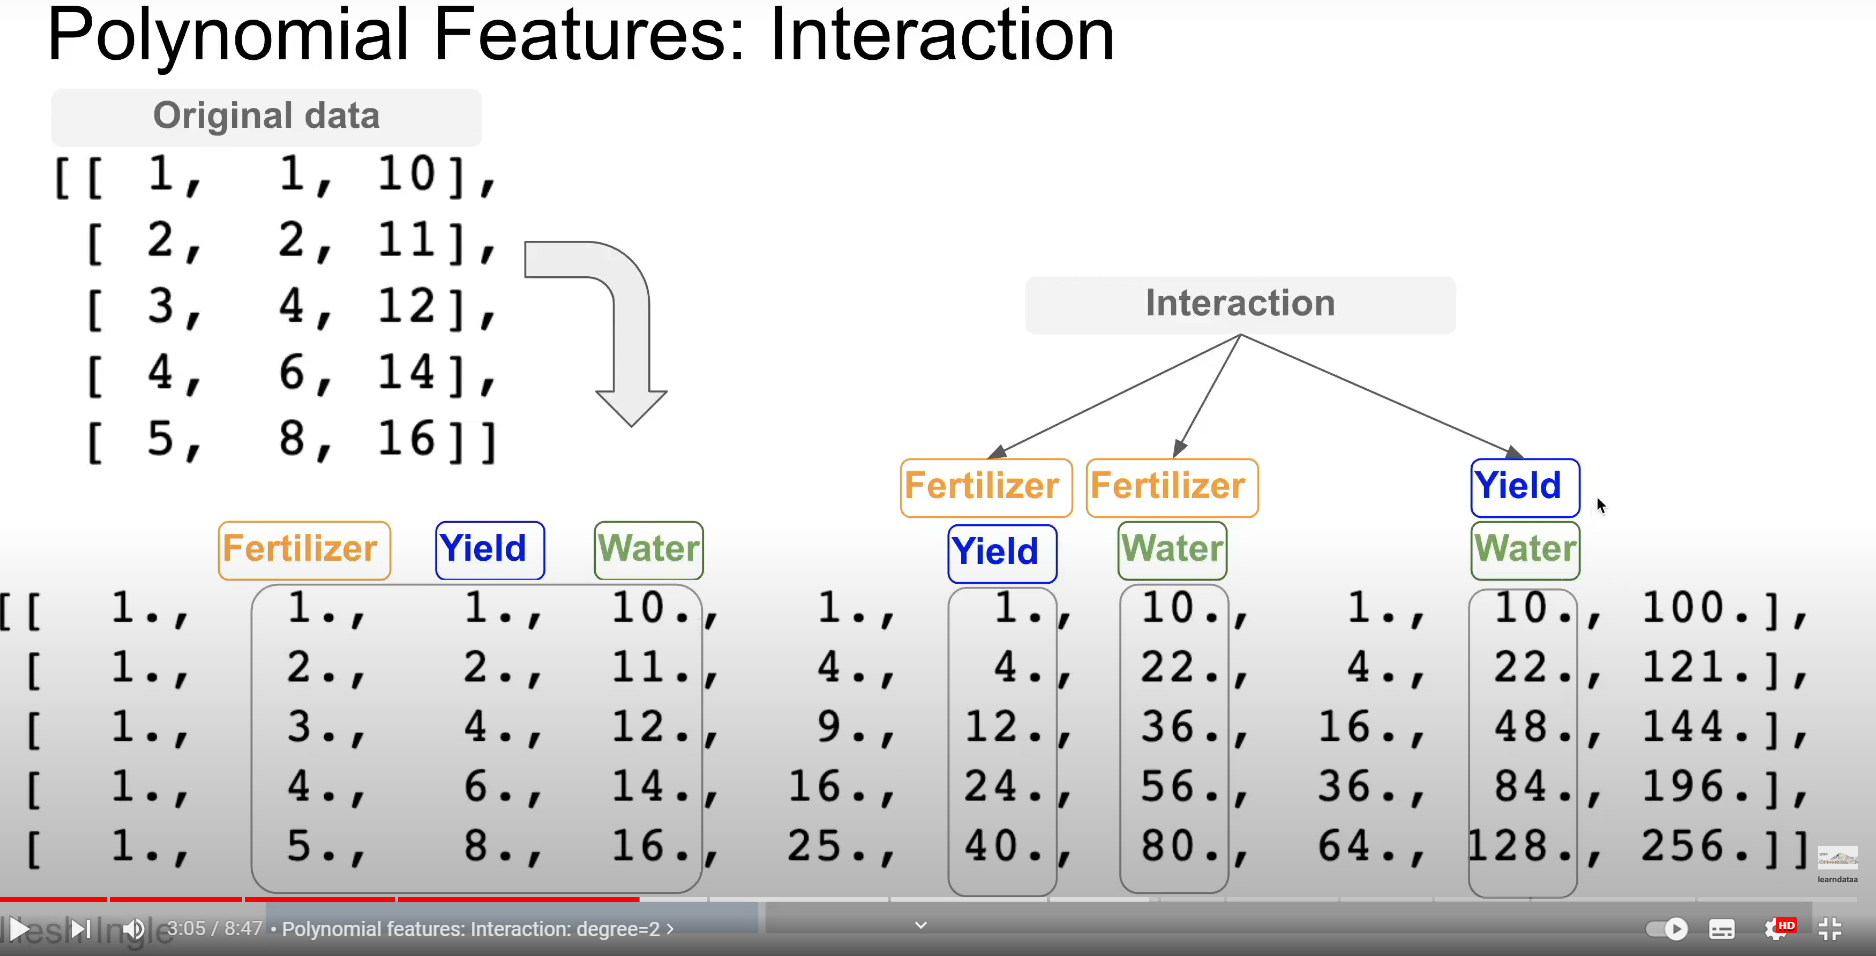

In [ ]:
titanic.shape

(891, 9)

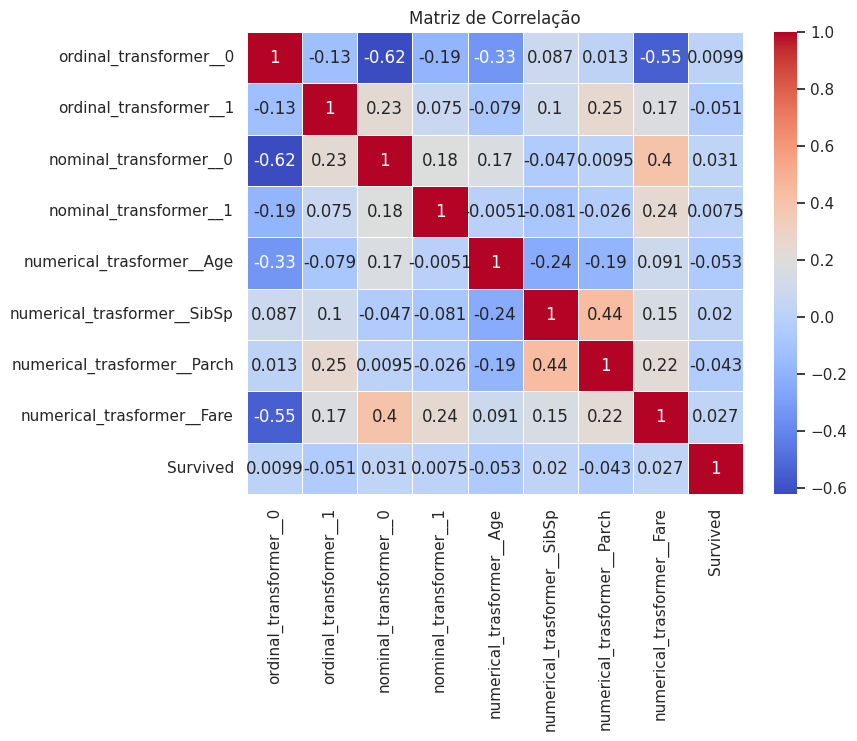

In [ ]:
# Vamos analisar as correlações para ver se tem uma linearidade
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Juntando o X_train e y_train com os preprocessamentos realizados para analisar as correlações
# Antes temos que converter X_train_transformed para dataframe
X_train_transformed_df = pd.DataFrame(X_train_transformed, columns=transformer.get_feature_names_out())
corr_data = pd.concat([X_train_transformed_df, y_train], axis=1)

# Calcula a matriz de correlação
correlation_matrix = corr_data.corr()

# Cria o gráfico de calor (heatmap) usando seaborn
sns.set(style="white")  # Estilo do gráfico
plt.figure(figsize=(8, 6))  # Tamanho da figura

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Matriz de Correlação')
plt.show()

Vimos que tivemos um resultado com muito pouca correlação entre as features, podemos tentar aplicar o polynomial feature

Vamos fazer o mesmo pipeline que antes mas empregando a PolynomialFeatures

In [ ]:
colunas_numericas = ['Age', 'SibSp','Parch', 'Fare'] # Testar Pclass como numerica(talvez tenha uma ordenação)
colunas_categoricas_ordinal = ['Pclass', 'Sex'] # Vão ser as colunas que possuem uma ordenação ou que são dummiers(0 ou 1)
colunas_categoricas_nominal = ['Cabin', 'Embarked'] # São aquelas que não possuem uma ordenação nas classes, não podemos usar ordinal encoder

# Vamos criar o pipeline de cada encoding para cada lista de colunas
ordinal_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')), # substituindo valores nulos pela moda
    ('encoder', ce.OrdinalEncoder()),
    ('poly', PolynomialFeatures(degree = 3, interaction_only=False))
])

nominal_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')), # substituindo valores nulos pela moda
    ('encoder', ce.TargetEncoder()),
    ('poly', PolynomialFeatures(degree = 3, interaction_only=False))
])

numerical_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree = 3, interaction_only=False))

    # Poderia tentar transformação polinomial
])

# Transformando as colunas através do pipeline feito acima
transformer = ColumnTransformer([
    ('ordinal_transformer', ordinal_pipe, colunas_categoricas_ordinal),
    ('nominal_transformer', nominal_pipe, colunas_categoricas_nominal),
    ('numerical_trasformer', numerical_pipe, colunas_numericas)
])

# Aplicando os encoder na base de dados de treino e apos nas de teste
X_train_transformed = transformer.fit_transform(X_train, y_train)
X_test_transformed = transformer.transform(X_test)

In [ ]:
logit = LogisticRegression()
logit.fit(X_train_transformed, y_train)
y_pred = logit.predict(X_test_transformed)
print(f'acuracia: {accuracy_score(y_test, y_pred):.2f}')
print(f'Recall: {recall_score(y_test, y_pred):.2f}')
print(f'Precision: {precision_score(y_test, y_pred):.2f}')
print(f'F1: {f1_score(y_test, y_pred):.2f}')
print(f'ROC/AUC: {roc_auc_score(y_test, y_pred):.2f}')

acuracia: 0.79
Recall: 0.65
Precision: 0.81
F1: 0.72
ROC/AUC: 0.77


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
